In [1]:
#Imporitng libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from pylab import rcParams
sns.set()
rcParams["figure.figsize"] = (10, 6)

In [2]:
#Loading the Dataset
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## EDA

In [7]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [9]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [10]:
#Droping unnecessary columns
df.drop(columns = ["seats", "torque", "max_power"], inplace=True)

In [11]:
# For now let's make NaN value as 0 in mileage and engine column

df.fillna(0, inplace=True)

In [12]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
dtype: int64

In [13]:
# let's see the data where mileage value and engine values are 0

df.loc[df.mileage == 0].head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,0,0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0,0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,0,0
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0,0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,0,0


- we can see that Car company and name are same but car version are differnce
- we can replace that 0 mileage value with mean value of same care name's mileage value
- we can replace that 0 engine value with median value of same care name's engine value

In [14]:
# let's split the numeric values from mileage and engine and convert it into float or int

df.mileage = df.mileage.apply(lambda x: float(str(x).split()[0]))
df.engine = df.engine.apply(lambda x: int(str(x).split()[0]))
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
2521,Maruti Wagon R LXI,2004,85000,110000,Petrol,Individual,Manual,First Owner,18.90,998
5551,Mahindra TUV 300 T4,2016,600000,60000,Diesel,Individual,Manual,First Owner,18.49,1493


In [15]:
# let's separate company and car name from name column

df["comp_car_name"] = df.name.apply(lambda x: str(x).split()[0] + " " + str(x).split()[1])
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
3558,Hyundai i20 Magna Optional 1.4 CRDi,2013,345000,40000,Diesel,Individual,Manual,First Owner,21.90,1396,Hyundai i20
7553,Chevrolet Cruze LTZ AT,2016,750000,67600,Diesel,Individual,Automatic,First Owner,14.81,1998,Chevrolet Cruze


In [16]:
# let's check how many records have 0 mileage values

len(df.loc[df.mileage == 0])

238

In [17]:
# now let's fill the mileage value with mean value of same car name's mileage values wherever it has 0 value

dropable_index = []
for i in df.loc[df.mileage == 0].index:
    missing_mileage_car_name = df.loc[i, "comp_car_name"]
    avg_mileage = df.loc[(df.name.str.contains(missing_mileage_car_name)) & (df.mileage !=0), "mileage"].mean()
    if np.nan is avg_mileage:
        # here if mean value is nan then it means in our data set there are no other same company name car available
        # so for that we have one option we have to drop that records
        dropable_index.append(i)
    else:
        df.loc[i, "mileage"] = avg_mileage

# let's drop those records which i did not able to fill the mileage value because that car name was unique
df.drop(dropable_index, axis=0, inplace=True)
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
3384,Maruti Wagon R AMT VXI,2017,380000,29000,Petrol,Individual,Automatic,First Owner,20.51,998,Maruti Wagon
5712,Chevrolet Tavera B1-10 seats BSII,2009,295000,195000,Diesel,Individual,Manual,Second Owner,14.80,2499,Chevrolet Tavera
2537,Toyota Fortuner 4x4 MT,2014,1700000,80000,Diesel,Individual,Manual,Second Owner,12.55,2982,Toyota Fortuner


In [18]:
# let's see how many records have 0 value in engine column

len(df.loc[df.engine == 0])

200

In [19]:
# now let's fill the engine value with median value of same car name's engine value wherever engine value is 0

for i in df.loc[df.engine == 0].index:
    missing_engine_car_name = df.loc[i, "comp_car_name"]
    median_engine = df.loc[(df.name.str.contains(missing_engine_car_name)) & (df.engine != 0), "engine"].median()
    
    df.loc[i, "engine"] = median_engine

df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
399,Honda City i-VTEC CVT V,2018,1085000,1000,Petrol,Individual,Automatic,First Owner,18.0,1497.0,Honda City
7030,Hyundai i20 1.2 Spotz,2018,650000,15000,Petrol,Individual,Manual,First Owner,18.6,1197.0,Hyundai i20
1810,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1,2179.0,Mahindra XUV500


In [20]:
# let's see how many records are remaining with 0 engine value
len(df.loc[df.engine == 0])

0

## Exploring Name Feature

In [21]:
# let's find unique values of name columns

df.name.nunique()

2043

##### Observation:
- we have 2058 unique car

## Exploring Years Feature

In [22]:
# let's find unique values of year columns

df.year.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2003, 2008, 2020, 1999, 2000, 2004,
       1994, 1998, 1997, 1995, 1996, 1991], dtype=int64)

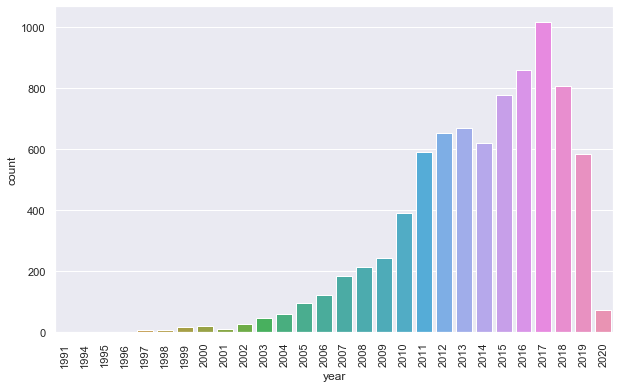

In [23]:
# let's plot it using count plot it see the variation of years
sns.countplot(df.year)
plt.xticks(rotation=90)
plt.show()

##### Observation:
- We have cars from year 1983 to 2020

## Exploring Km Driven Feature

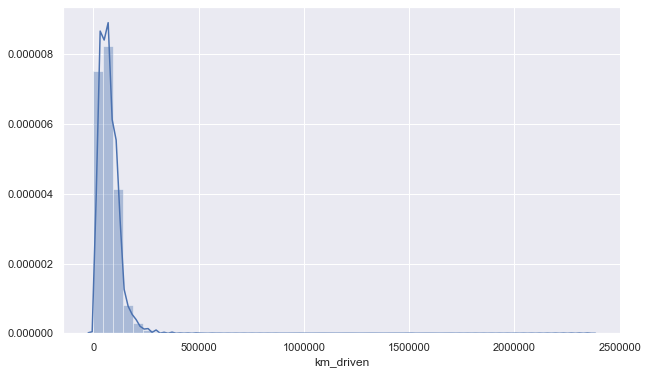

In [24]:
# let's see the data distribution of km_driven

sns.distplot(df.km_driven)

In [25]:
# let's see min and max value

print("Minimum Km Driven:", df.km_driven.min())
print("Maximum Km Driven:", df.km_driven.max())

Minimum Km Driven: 1
Maximum Km Driven: 2360457


##### Observation:
- Our Km Driven data is right skewed but it's okay some cars are old so it driven more than lac KM

In [26]:
df.fuel.value_counts()

Diesel    4389
Petrol    3622
CNG         57
LPG         38
Name: fuel, dtype: int64

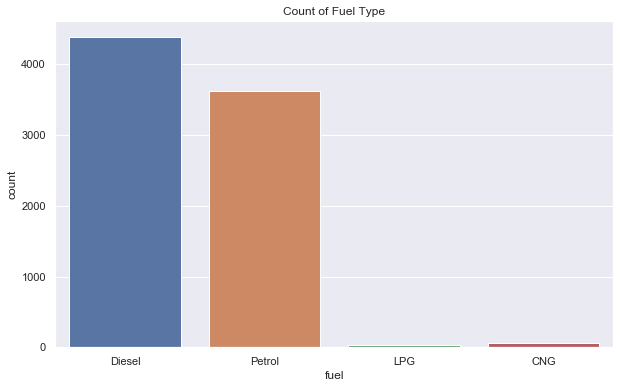

In [27]:
# let's see the variation of fuel type

sns.countplot(df.fuel)
plt.title("Count of Fuel Type")
plt.show()

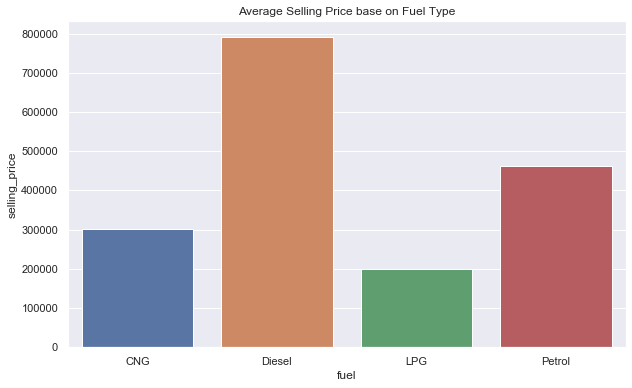

In [28]:
# Let's find avg price of the car according to it's fuel type

avg_fuel_selling_price = df.groupby("fuel").selling_price.mean().reset_index()
sns.barplot(avg_fuel_selling_price.fuel, avg_fuel_selling_price.selling_price)
plt.title("Average Selling Price base on Fuel Type")
plt.show()

##### Observation:
- Maximum cars are run on Diesel and Petrol fuel and some are on LPG and CNG
- The cars which has Diesel fuel type it's selling price is high 
- so Fuel type is affect to selling price

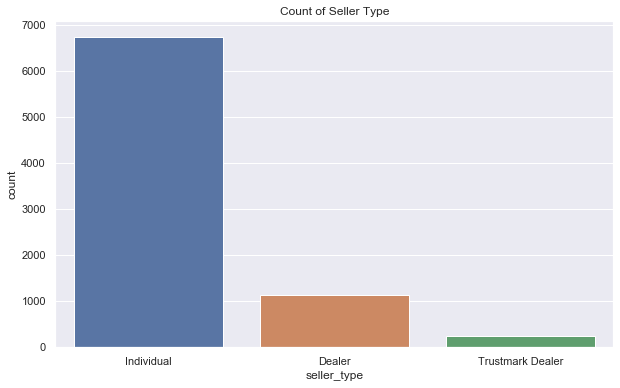

In [29]:
## let's look at seller_type 

sns.countplot(df.seller_type)
plt.title("Count of Seller Type")
plt.show()

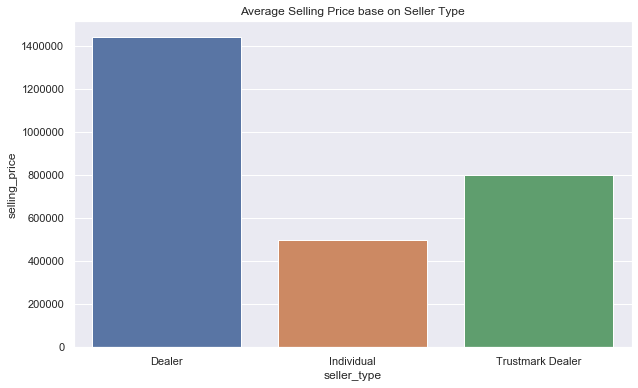

In [30]:
# let's see seller_type feature affect on selling price or not

avg_seller_type_selling_price = df.groupby("seller_type").selling_price.mean().reset_index()

sns.barplot(avg_seller_type_selling_price.seller_type, avg_seller_type_selling_price.selling_price)
plt.title("Average Selling Price base on Seller Type")
plt.show()

##### Observation:
- Individual Sellers are high than Dealer and Tustmark Delaer
- Selling Price is high when seller type are Dealer and Trustmark Dealer
- so Seller Type affect to Selling Price

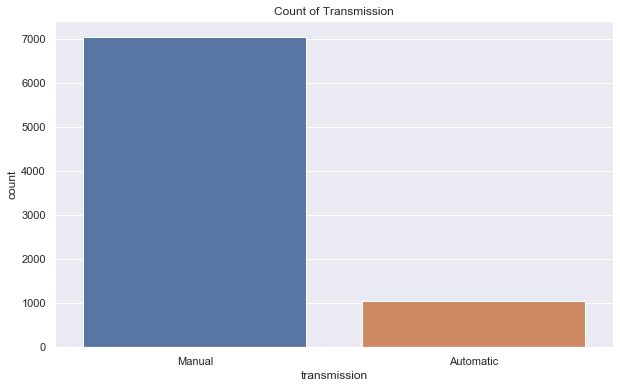

In [31]:
# let's look at transmission types

sns.countplot(df.transmission)
plt.title("Count of Transmission")
plt.show()

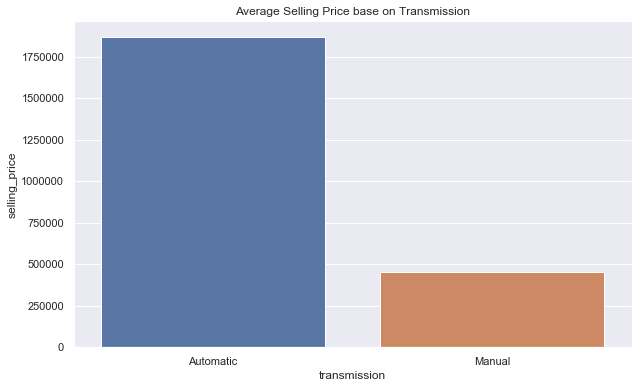

In [32]:
# let's see the average selling price manual and automatic transmission

avg_transmission_selling_price = df.groupby("transmission").selling_price.mean().reset_index()

sns.barplot(avg_transmission_selling_price.transmission, avg_transmission_selling_price.selling_price)
plt.title("Average Selling Price base on Transmission")
plt.show()

##### Observation:
- We have more cars which have a manual transmission compare to automatic transmission
- The Selling price of an automatic transmission are high than manual transmission
- so here transmission types are affect to selling price

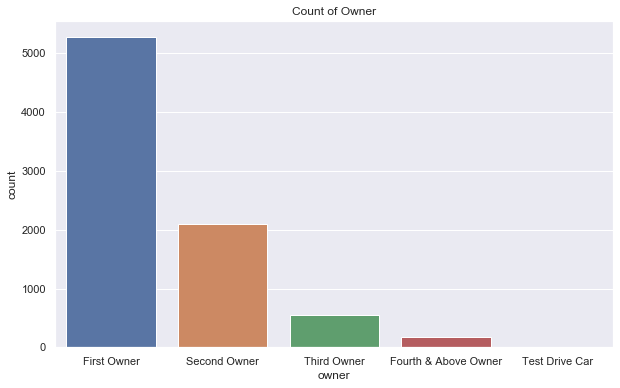

In [33]:
# let's look at owner category

sns.countplot(df.owner)
plt.title("Count of Owner")
plt.show()

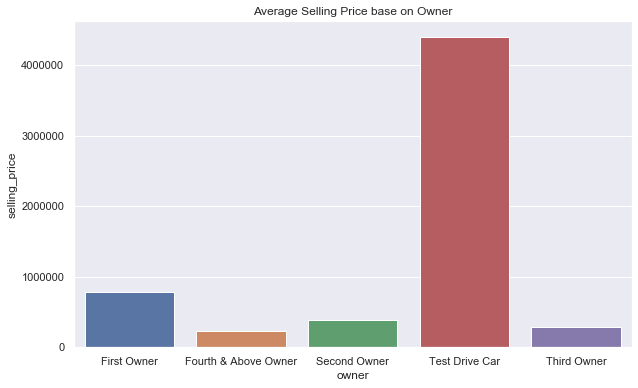

In [34]:
# let's see the average selling price base on owner

avg_owner_selling_price = df.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

In [35]:
# Average selling price of owner type test drive car is very high it might be an outlier let's see the data
# which have owner type is Test Drive Car

df.loc[df.owner == "Test Drive Car"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,Volkswagen Vento
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,Honda Civic


In [36]:
df.loc[df.name == "Volkswagen Vento 1.5 TDI Highline BSIV"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,Volkswagen Vento


- Here we can see the cars which belongs to Test Drive Car category of owner are unique models
- Owner Type Test Drive Car are 5 records and 3 unique model so we can easily drop it to remove that outlier

In [37]:
# let's drop records which has Test Drive Car owner type

df.drop(df.loc[df.owner == "Test Drive Car"].index, axis=0, inplace=True)

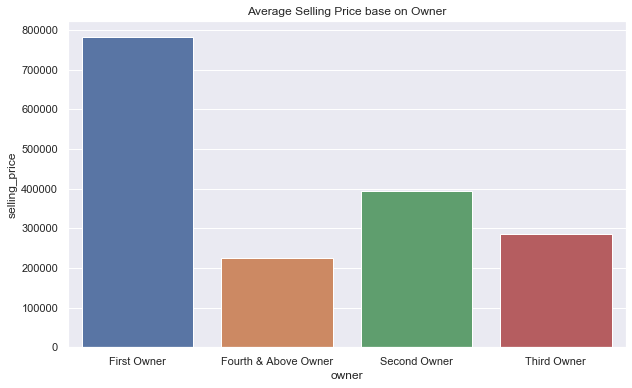

In [38]:
# now again let's see the average selling price base on owner

avg_owner_selling_price = df.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

##### Observation:
- We have more cars from first owner
- The car selling price is more when owner is first compare to other owner
- so here owner feature is affect to selling price

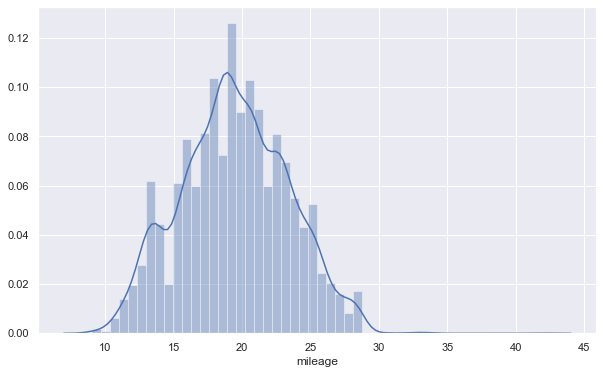

In [39]:
# let's look the data distribution of mileage column

sns.distplot(df.mileage)
plt.show()

##### Observation:
- Here mileage data are noramlly distributed so our regression model will perform better on normal distribution data
- Mileage feature is important for car so it is affect on selling price

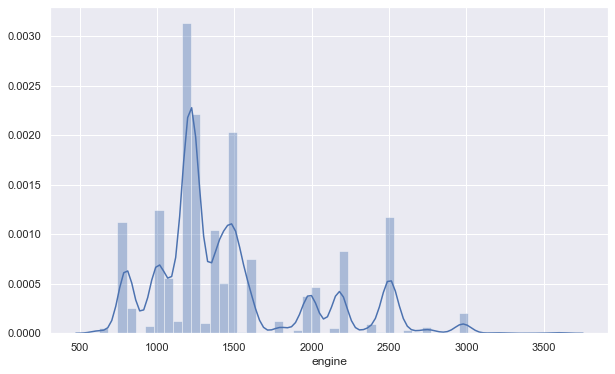

In [40]:
# let's look at engine

sns.distplot(df.engine)
plt.show()

In [41]:
df[["engine", "selling_price"]].corr()

,engine,selling_price
engine,1.000000,0.458291
selling_price,0.458291,1.000000


##### Observation:
- The data of engine is not normally distributed but engine size is really matter for car
- We can see engine is highly co-relates with selling price

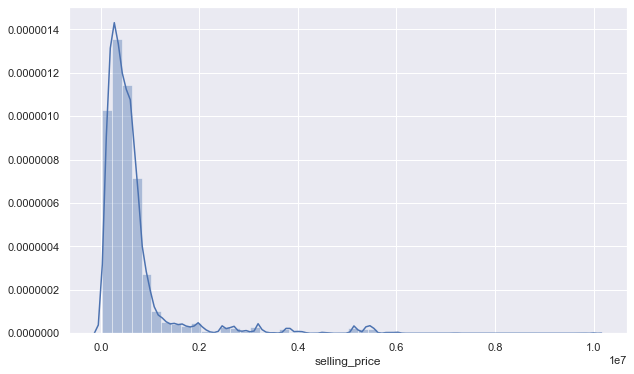

In [42]:
# let's look at the data distribution of selling_price

sns.distplot(df.selling_price)
plt.show()

- Selling price data are distributed in righ skewed, there may be chance of outliers let's try to find it

In [43]:
# finding upper and lower limit using percertile 
# here i'm going to use 99.9% for upper limit and 0.1% for lower limit

lower_limit = df.selling_price.quantile(0.001)
upper_limit = df.selling_price.quantile(0.999)

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 35000.0
Upper Limit: 5848000.000000011


In [44]:
# let's see the data which are below the range of lower limit

df.loc[df.selling_price < lower_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
1926,Maruti 800 Std,2004,31504,110000,Petrol,Individual,Manual,Third Owner,16.100000,796.0,Maruti 800
2145,Maruti Zen LXI,2001,30000,10000,Petrol,Individual,Manual,First Owner,17.300000,993.0,Maruti Zen
3919,Hyundai Santro LE,2001,33983,80000,Petrol,Individual,Manual,Second Owner,18.239178,1086.0,Hyundai Santro
4811,Maruti Wagon R VXI,2004,33351,90000,Petrol,Individual,Manual,Third Owner,18.900000,998.0,Maruti Wagon
5714,Maruti 800 AC,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.100000,796.0,Maruti 800
5965,Maruti 800 Std,2000,31000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.100000,796.0,Maruti 800
6776,Hyundai Santro GLS I - Euro I,2000,30000,90000,Petrol,Individual,Manual,Third Owner,18.239178,1086.0,Hyundai Santro


In [45]:
# let's see the data which are below the range of upper limit

df.loc[df.selling_price > upper_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,Volvo XC90
1071,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
2938,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,BMW X7
4101,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
4766,BMW 6 Series GT 630d Luxury Line,2018,6000000,27000,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
5258,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
7713,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class


##### Observation:
- Here selling price data are not normally distributed it's right skewed because most of the car price are high
- Lower selling price is 29999 of maruti car and Higher price is 10000000 of Volvo car these are normal it's not an outlier

## Feature Engineering

In [46]:
# let's do target guided label encoding for name columns

car_name_encoded = df.groupby("name").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting name and index value into dict using zip then map it with origial series
df.name = df.name.map(dict(zip(car_name_encoded.name, car_name_encoded.index)))
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
6037,1428,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49,1493.0,Mahindra TUV
2151,363,2010,200000,80000,Petrol,Individual,Manual,Second Owner,18.90,1061.0,Maruti Wagon
2680,1397,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,Skoda Rapid


In [47]:
# let's do target guided label encoding for fuel type bcz diesel cars has high price compare to other

fuel_encoded = df.groupby("fuel").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting fuel and index value into dict using zip then map it with original series
df.fuel = df.fuel.map(dict(zip(fuel_encoded.fuel, fuel_encoded.index)))
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
1524,499,2017,300000,50000,2,Individual,Manual,Second Owner,24.70,796.0,Maruti Alto
1889,229,2006,120000,120000,2,Individual,Manual,Fourth & Above Owner,19.70,796.0,Maruti Alto
6034,298,2010,142000,49200,2,Individual,Manual,Second Owner,19.81,1086.0,Hyundai i10


In [48]:
# let's encode seller_type using target guided encoding

seller_type_encoded = df.groupby("seller_type").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# creating dict using enumerator and key as count value and value as seller_type_encoded value then map it with original series
df.seller_type = df.seller_type.map({k:v for v, k in enumerate(seller_type_encoded.seller_type, 0)})
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
6706,1397,2016,645000,11000,2,2,Automatic,First Owner,14.30,1598.0,Skoda Rapid
3366,1174,2016,530000,120000,2,0,Manual,Second Owner,17.19,1197.0,Hyundai i20
1469,484,2003,300000,98000,3,0,Manual,First Owner,10.50,2179.0,Mahindra Scorpio


In [49]:
# let's encode transmission using one hot encoding
# in transmission column we have two values Manual and Automatic

transmission_encoded = pd.get_dummies(df.transmission, prefix="transmission", drop_first=True)
# here droping first value to prevent dummy variable trap, first value was Automatic so 0 will represent that value

# let's concat encoded transmission series with main_data data frame

df = pd.concat([df, transmission_encoded], axis=1)
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name,transmission_Manual
4834,928,2016,380000,80000,3,0,Manual,Second Owner,24.40,1120.0,Hyundai Xcent,1
5481,1430,2016,616000,112000,3,0,Manual,First Owner,22.54,1396.0,Hyundai i20,1
999,35,1999,55000,60000,2,0,Manual,Second Owner,16.10,796.0,Maruti 800,1


In [50]:
# let's split owner value and encode it according to it's number

df.owner = df.owner.apply(lambda x: str(x).split()[0])

# now let's do label encoding

df.owner = df.owner.map({"First": 1, "Second": 2, "Third": 3, "Fourth": 4})
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name,transmission_Manual
1954,229,2014,110000,50000,2,0,Manual,2,19.70,796.0,Maruti Alto,1
5634,1048,2016,488000,80000,2,0,Manual,2,20.85,1197.0,Maruti Swift,1
1419,431,2014,220000,50000,2,0,Manual,3,21.10,814.0,Hyundai EON,1


In [51]:
# let's drop tranmsission and comp_car_name and make a final_data data frame

data = df.drop(columns = ["transmission", "comp_car_name"]).copy()

In [52]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,transmission_Manual
0,1289,2014,450000,145500,3,0,1,23.40,1248.0,1
1,1200,2014,370000,120000,3,0,2,21.14,1498.0,1
2,259,2006,158000,140000,2,0,3,17.70,1497.0,1
3,391,2010,225000,127000,3,0,1,23.00,1396.0,1
4,226,2007,130000,120000,2,0,1,16.10,1298.0,1


In [53]:
# selecting features

X = data.drop(columns="selling_price")
Y = data.selling_price

In [54]:
X.head()

,name,year,km_driven,fuel,seller_type,owner,mileage,engine,transmission_Manual
0,1289,2014,145500,3,0,1,23.40,1248.0,1
1,1200,2014,120000,3,0,2,21.14,1498.0,1
2,259,2006,140000,2,0,3,17.70,1497.0,1
3,391,2010,127000,3,0,1,23.00,1396.0,1
4,226,2007,120000,2,0,1,16.10,1298.0,1


In [55]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

## Train Test split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

## Model Building
#### Model training using following algorithms
- Linear Regression
- Decision tree Regressor
- Random forest Regressor


#### 1.Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [54]:
Y_pred_lr = lr.predict(X_test)

#### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [56]:
Y_pred_tree = tree.predict(X_test)

#### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train,Y_train)

RandomForestRegressor()

In [58]:
Y_pred_random = random.predict(X_test)

## Model Evaluations

In [59]:
from sklearn import metrics

In [60]:
print('Linear Regression:')
print('MAE: ',metrics.mean_absolute_error(Y_test,Y_pred_lr))
print('MSE: ',metrics.mean_squared_error(Y_test,Y_pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_lr)))
print('R squared: ',metrics.r2_score(Y_test,Y_pred_lr))

Linear Regression:
MAE:  262197.0285758723
MSE:  229098333338.92978
RMSE:  478642.17672383384
R squared:  0.5777541335917691


In [61]:
print('Decision Tree Regressor:')
print('MAE: ',metrics.mean_absolute_error(Y_test,Y_pred_tree))
print('MSE: ',metrics.mean_squared_error(Y_test,Y_pred_tree))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_tree)))
print('R squared: ',metrics.r2_score(Y_test,Y_pred_tree))

Decision Tree Regressor:
MAE:  56784.01181566851
MSE:  12616440872.12719
RMSE:  112322.93119451251
R squared:  0.9767469281447875


In [62]:
print('Random Forest Regressor:')
print('MAE: ',metrics.mean_absolute_error(Y_test,Y_pred_random))
print('MSE: ',metrics.mean_squared_error(Y_test,Y_pred_random))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_random)))
print('R squared: ',metrics.r2_score(Y_test,Y_pred_random))

Random Forest Regressor:
MAE:  44244.210060940204
MSE:  6646259529.462494
RMSE:  81524.5946292436
R squared:  0.9877504319979487


**After Fitting all the models here is my result that from all of the 3 algorithms Random Forest Regressor is somehow gives Test score**

In [64]:
# let's save models and appropriate encoding files, it will help me to predict on web app

# let's save encoded data frame as csv files, if save it in json format it will take more memory than csv file
car_name_encoded.to_csv("car_name_encoded.csv", index=False)
fuel_encoded.to_csv("fuel_encoded.csv", index=False)
seller_type_encoded.to_csv("seller_type.csv", index=False)

# let's save the model into pickle file
with open("car_price_model.pickle", "wb") as f:
    pickle.dump(random, f)